## House Price Prediction using Linear, Ridge and Lasso Regression

#### Assignment Part-I
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

 
##### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1870]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import os
from statsmodels.stats.outliers_influence import variance_inflation_factor
# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [1871]:
# reading the dataset
houses = pd.read_csv("train.csv")

In [1872]:
# summary of the dataset: 1460 rows, 81 columns
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1873]:
#Checking the %age of null in dataframe
null_count=round(100*(houses.isnull().sum()/len(houses.index)),2)
list(null_count)

[0.0,
 0.0,
 0.0,
 17.74,
 0.0,
 0.0,
 93.77,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.55,
 0.55,
 0.0,
 0.0,
 0.0,
 2.53,
 2.53,
 2.6,
 2.53,
 0.0,
 2.6,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.07,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 47.26,
 5.55,
 5.55,
 5.55,
 0.0,
 0.0,
 5.55,
 5.55,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 99.52,
 80.75,
 96.3,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]


#### Few columns have greater than 85% missing values so we will be remove them
1.Alley
2.PoolQC
3.Miscfeature

In [1874]:
houses.drop(['Alley','PoolQC','MiscFeature'],axis=1,inplace = True)
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [1875]:
#On closely looking to the missing data we can see that below mensioned feilds have genuine Not applicables i.e. NAs so imputting with a NA 
#For example PoolQC - Its possible a house might not have pool at all.
houses["Fence"] = houses["Fence"].replace(np.NaN,'No Fence')
houses["FireplaceQu"] = houses["FireplaceQu"].replace(np.NaN,'No Fireplace')
houses["GarageType"] = houses["GarageType"].replace(np.NaN,'No Garage')
houses["GarageFinish"] = houses["GarageFinish"].replace(np.NaN,'No Garage')
houses["GarageQual"] = houses["GarageQual"].replace(np.NaN,'No Garage')
houses["GarageCond"] = houses["GarageCond"].replace(np.NaN,'No Garage')
houses["MasVnrType"] = houses["MasVnrType"].replace(np.NaN,'None')
houses["BsmtQual"] = houses["BsmtQual"].replace(np.NaN,'No Basement')
houses["BsmtCond"] = houses["BsmtCond"].replace(np.NaN,'No Basement')
houses["BsmtExposure"] = houses["BsmtExposure"].replace(np.NaN,'No Basement')
houses["BsmtFinType1"] = houses["BsmtFinType1"].replace(np.NaN,'No Basement')
houses["BsmtFinType2"] = houses["BsmtFinType2"].replace(np.NaN,'No Basement')

In [1876]:
#Lets handle the missing numerical columns like LotFrontage
houses['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [1877]:
#We cloud see that almost 17.5% rows are missing and spread seems not to have any extreme outlier..so imputing with median
houses["LotFrontage"] = houses["LotFrontage"].replace(np.NaN, houses["LotFrontage"].median())

In [1878]:
#MasVnrArea can be not applicable for houses that donot have Mas neneer type..imputing with median
houses["MasVnrArea"] = houses["MasVnrArea"].replace(np.NaN, houses["MasVnrArea"].median())

In [1879]:
#GarageYrBlt has year built, lets impute with median so as not to lose data..
houses["GarageYrBlt"] = houses["GarageYrBlt"].replace(np.NaN, houses["GarageYrBlt"].median())

In [1880]:
#Only one row has electical as null..let remove that to make data consistent and without any missing value..
houses = houses[~houses["Electrical"].isnull()]

In [1881]:
#Lets again check if the data has any missing value..
null_count=round(100*(houses.isnull().sum()/len(houses.index)),2)
list(null_count)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

##### Now the data has no missing value and we are good to progress..

In [1882]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,No Fence,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,No Fence,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,No Fence,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,No Fence,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,No Fence,0,12,2008,WD,Normal,250000


In [1883]:
#Checking for any data duplication..
duplicates = houses[houses.duplicated()]
duplicates
#There no such data duplications

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [1884]:
#Analysing the numerical values column at a glance..
houses.describe()
#Lets now look at them in detail..

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.054832,56.881426,69.861549,10517.363948,6.100069,5.575737,1971.244003,1984.850583,103.187800,443.943797,...,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,2007.815627,180930.394791
std,421.411181,42.310746,22.035077,9984.666267,1.383171,1.113079,30.199555,20.644343,180.773158,456.106417,...,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,1.328542,79468.964025
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,60.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,79.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,164.500000,712.500000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1885]:

houses['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      57
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [1886]:
# MSZoning: Identifies the general zoning classification of the sale.
houses['MSZoning'].astype('category').value_counts()

RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [1887]:
# Street: Type of road access to property
houses['Street'].astype('category').value_counts()

Pave    1453
Grvl       6
Name: Street, dtype: int64

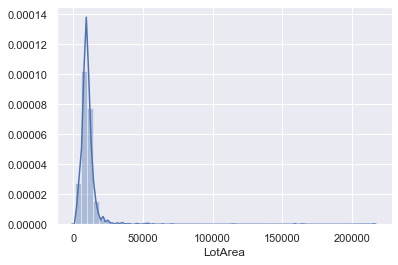

In [1888]:
# LotArea: : Lot size in square feet
sns.distplot(houses['LotArea'])
plt.show()

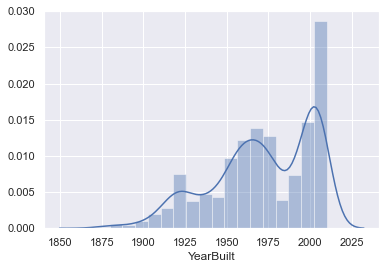

In [1889]:
#YearBuilt: Original construction date
sns.distplot(houses['YearBuilt'])
plt.show()

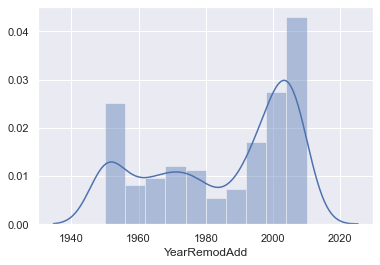

In [1890]:
# YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
sns.distplot(houses['YearRemodAdd'])
plt.show()

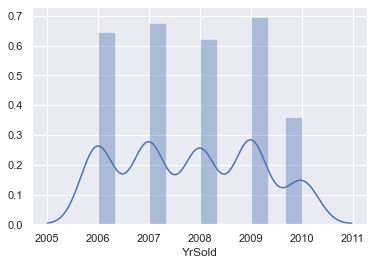

In [1891]:
# YrSold: Year Sold (YYYY)
sns.distplot(houses['YrSold'])
plt.show()

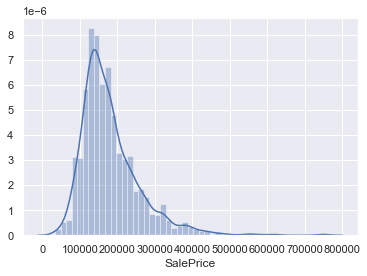

In [1892]:
# target variable: sale price of house
sns.distplot(houses['SalePrice'])
plt.show()

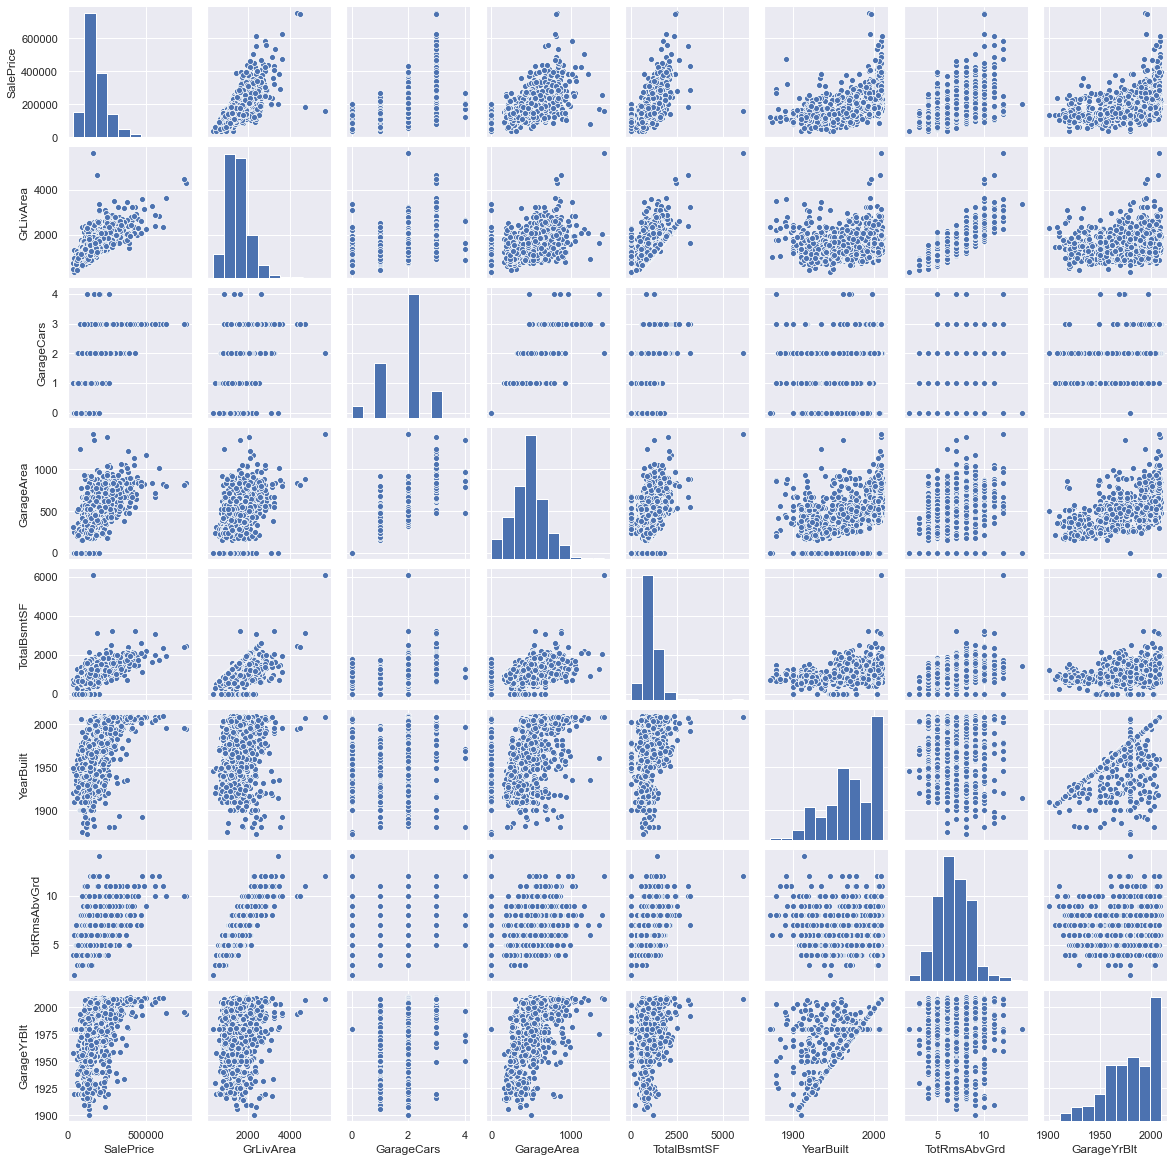

In [1893]:
#Let plot pairplot with some features vs SalePrice
sns.set()
feature = ['SalePrice', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(houses[feature], size = 2)
plt.show()

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

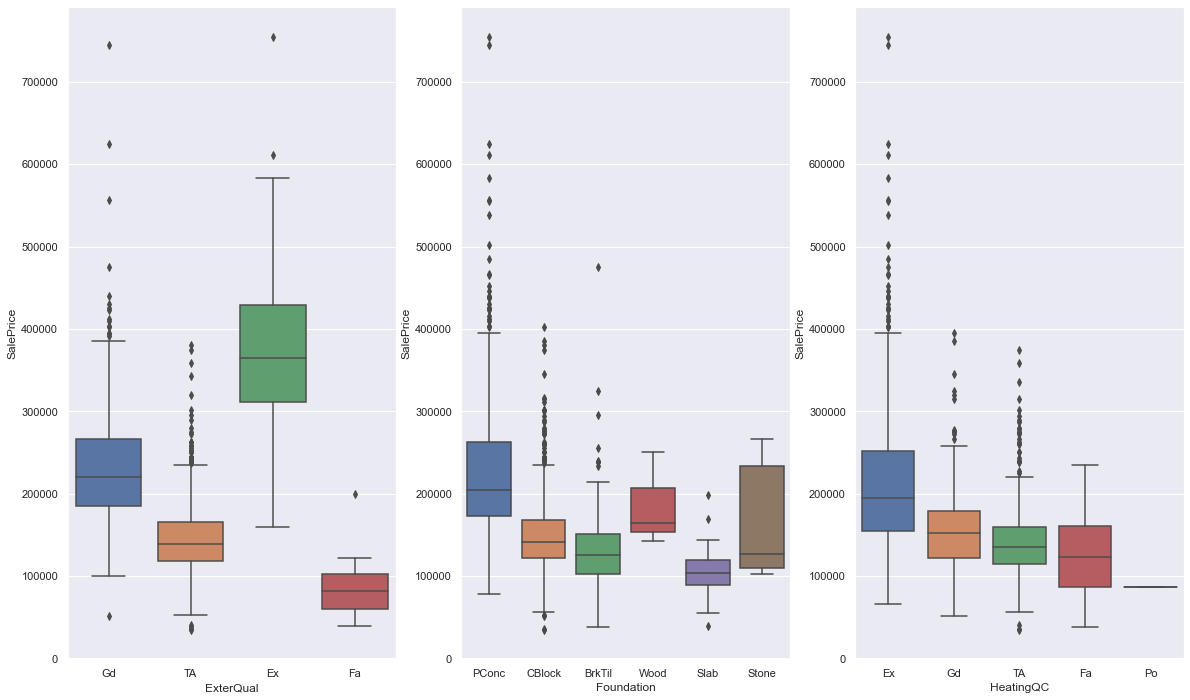

In [1894]:
#Let's see effect of ExterQual Foundation and HeatingQC on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x = 'ExterQual', y ='SalePrice', data = houses)
plt.subplot(1,3,2)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data =houses)
plt.subplot(1,3,3)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = houses)

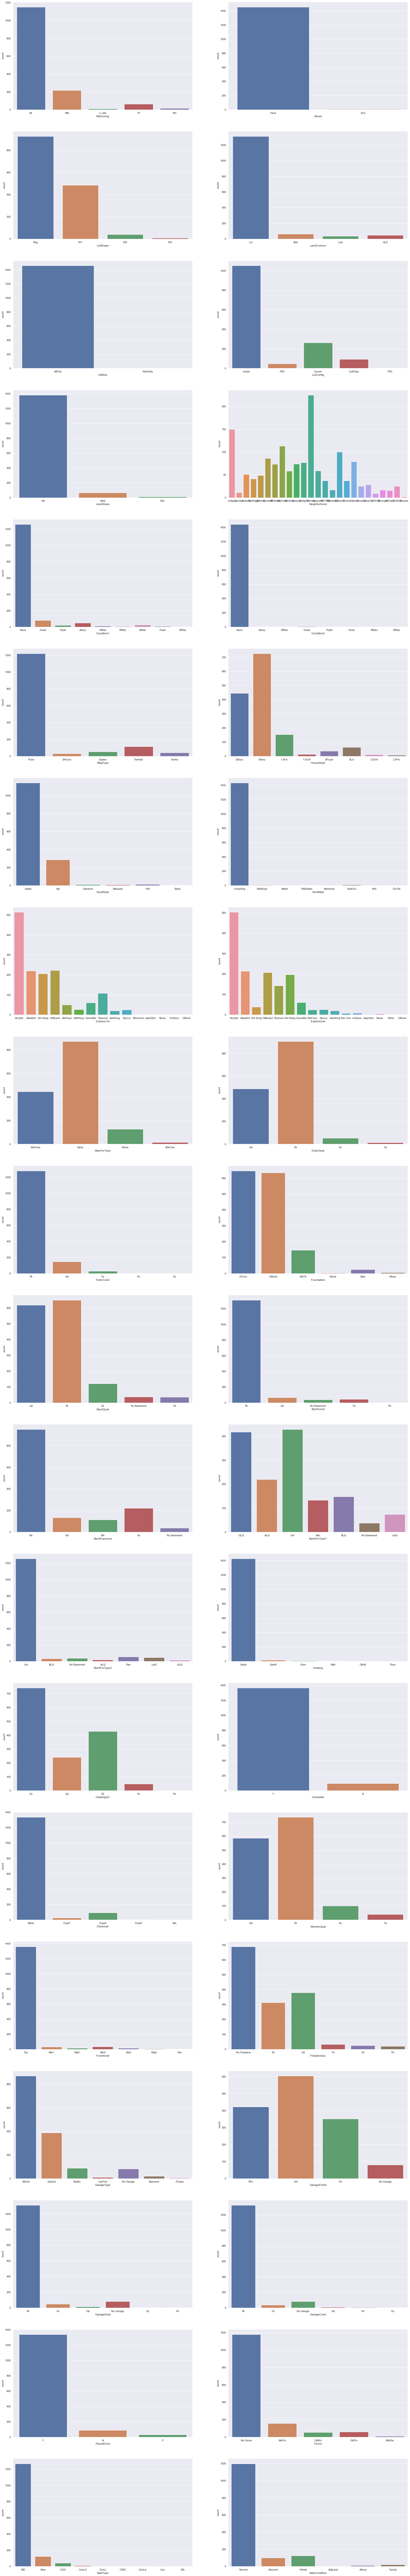

In [1895]:
categories = list(houses.select_dtypes(include=['object']))
# Visualising Categorical Data on subplot vs count

plt.figure(figsize=(30, 200))
i = 0
for col in categories :
    plt.subplot(20,2,i+1)
    sns.countplot(x = col, data = houses)
    i+=1

plt.show()

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [1896]:
# all numeric (float and int) variables in the dataset
houses_numeric = houses.select_dtypes(include=['float64', 'int64'])
houses_numeric.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [1897]:
# correlation matrix
cor = houses_numeric.corr()
#cor

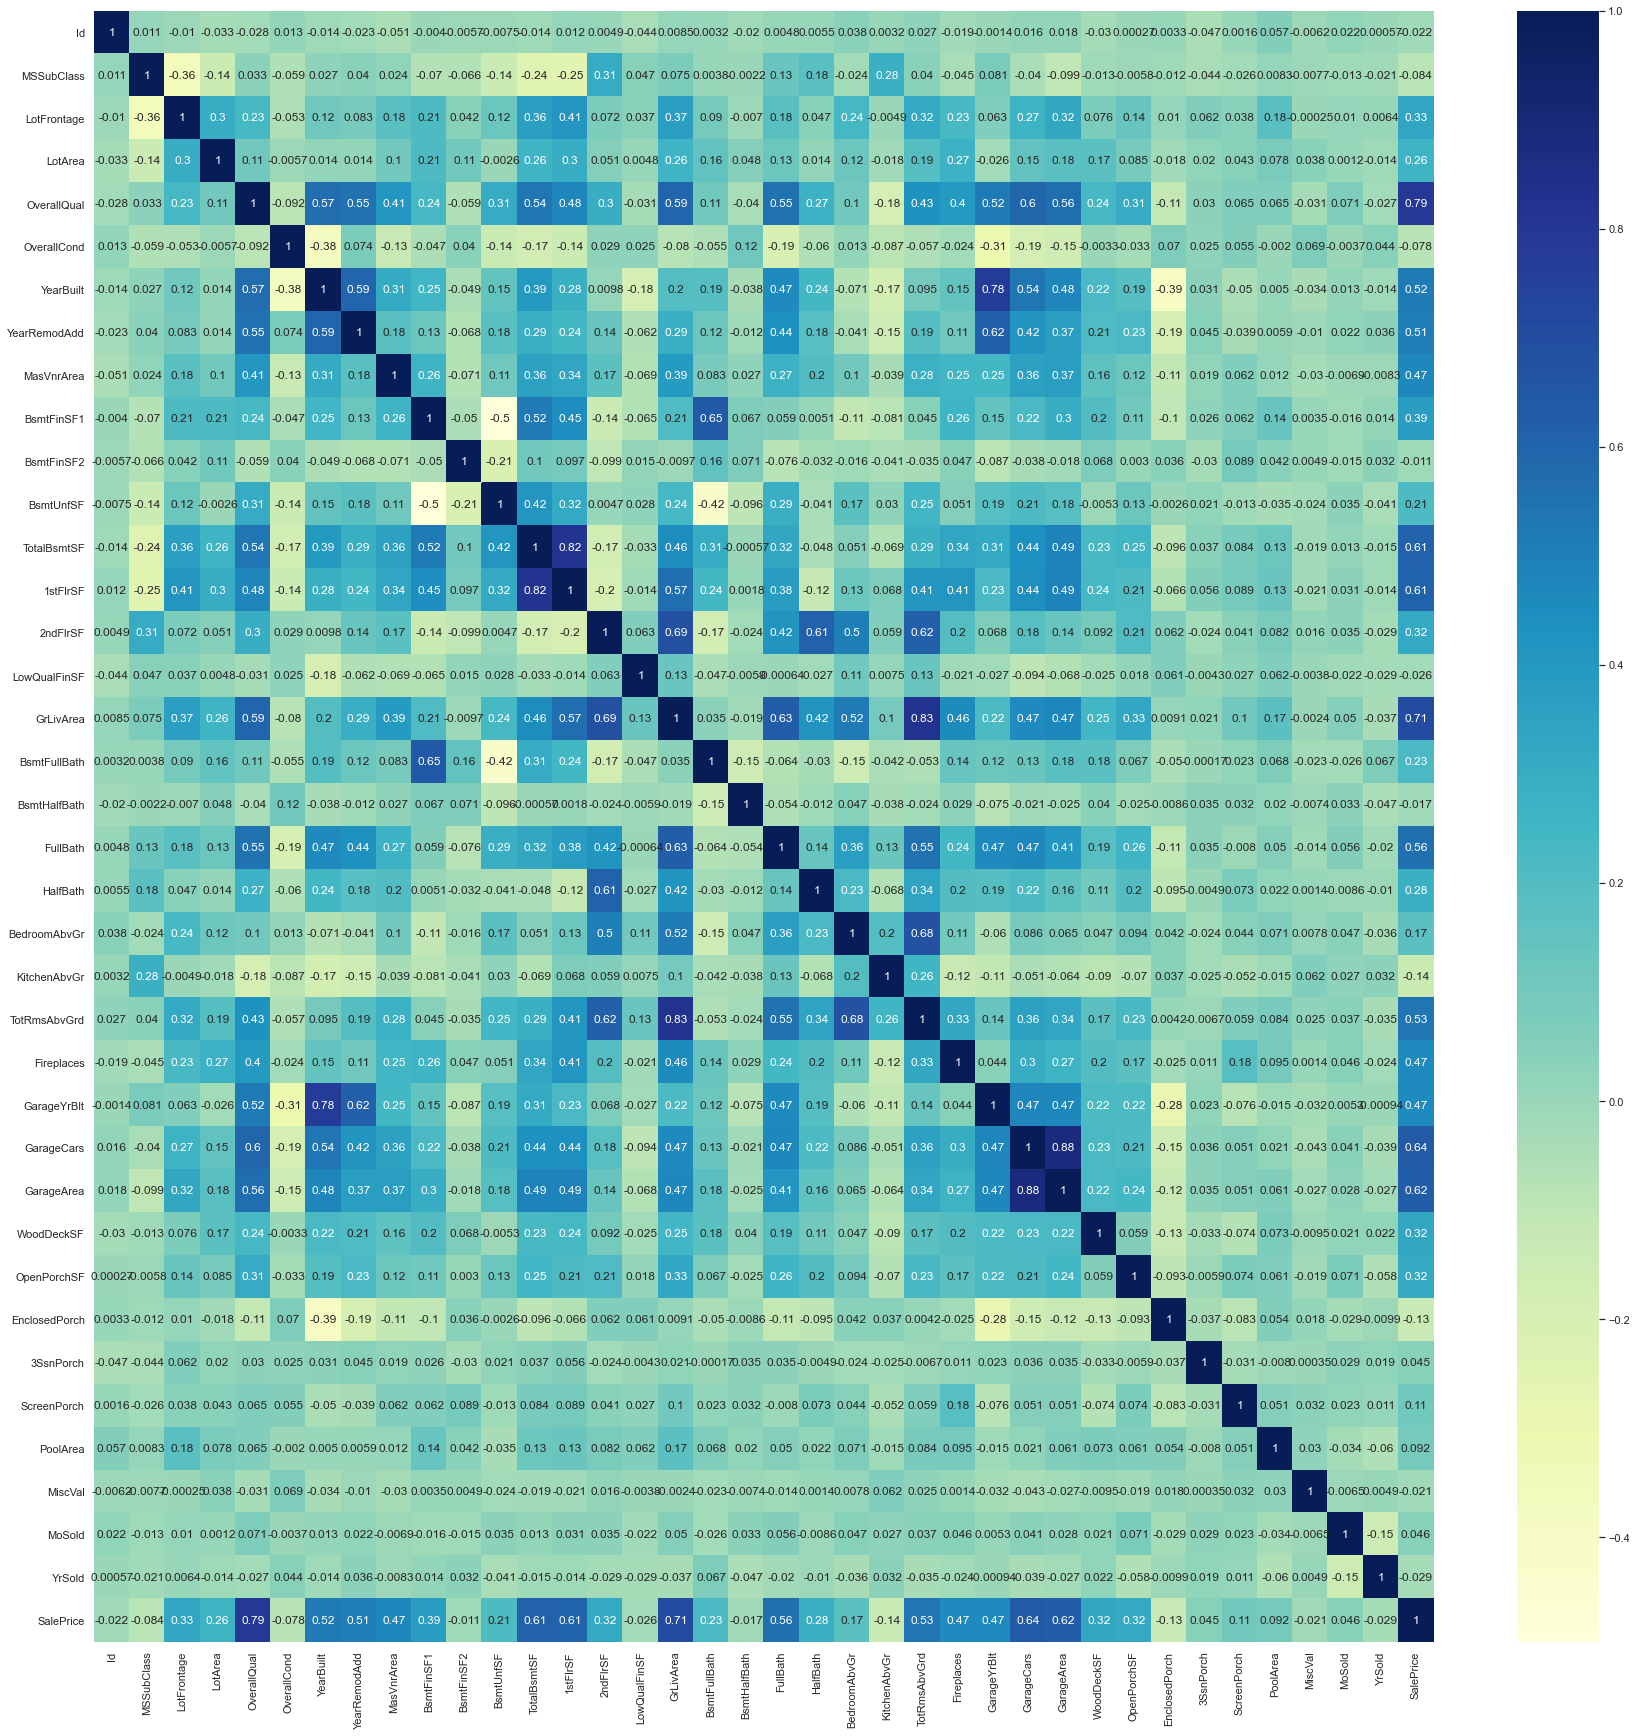

In [1898]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,30))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


The heatmap shows some useful insights:

Correlation of price with independent variables:
- Price is highly (positively) correlated with OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF (all of these variables represent the quality/space/comfort of the house)

- Price is negatively correlated to ```KitchenAbvGr``` and ```EnclosedPorch```. 

Correlation among independent variables:
- Many independent variables are highly correlated (look at the top-left part of matrix): GarageArea, GarageCars, GrLivArea, GarageYrBlt etc. are all measures of 'quality/space', and are positively correlated 


Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except ```MSSubClass```, which should rather be a categorical variable (so that dummy variable are created for the categories).

Note that it *can* be used in the model as a numeric variable also. 



In [1899]:
# variable formats
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

Here, although the variable ```MSSubClass``` is numeric (int), we'd rather treat it as categorical since it has only 16 discrete values. 

In [1900]:
# List of variables to map as per data dicionary
#This MSSubclass is placed as a numerical column but it is a categorical column..
# Applying the mapping of MSSubClass to the housing dataframe list as per dictionary
houses['MSSubClass'] = houses['MSSubClass'].map({20:'1-STORY 1946 & NEWER ALL STYLES', 
                                                 30:'1-STORY 1945 & OLDER', 
                                                 40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                                 45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                                 50:"1-1/2 STORY FINISHED ALL AGES",
                                                 60:"2-STORY 1946 & NEWER",
                                                 70:"2-STORY 1945 & OLDER",
                                                 75:'2-1/2 STORY ALL AGES',
                                                 80:'SPLIT OR MULTI-LEVEL',
                                                 85:'SPLIT FOYER',
                                                 90:'DUPLEX - ALL STYLES AND AGES',
                                                 120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                                 150:'1-1/2 STORY PUD - ALL AGES',
                                                 160:'2-STORY PUD - 1946 & NEWER',
                                                 180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                                 190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

In [1901]:
#Again checking the vales of MS Subclass
houses['MSSubClass'].value_counts()

1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      57
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: MSSubClass, dtype: int64

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [1902]:
#Lest derive Feature for house age and remodel age.. which would be the age of the house on selling year
houses['House_Age'] = houses['YrSold']-houses['YearBuilt']
houses['Remodel_age'] = houses['YrSold']-houses['YearRemodAdd']

In [1903]:
# dropping columns
houses.drop(['YearBuilt','YearRemodAdd'],1,inplace=True)

In [1904]:
# creating dummy variables for categorical variables

# subset all categorical variables
houses_categorical = houses.select_dtypes(include=['object'])
#houses_categorical.head()


In [1905]:
# convert into dummies - one hot encoding
houses_dummies = pd.get_dummies(houses_categorical, drop_first=True)
#houses_dummies.head()

In [1906]:
# drop categorical variables 
houses = houses.drop(list(houses_categorical.columns), axis=1)

In [1907]:
# concat dummy variables with houses
houses = pd.concat([houses, houses_dummies], axis=1)

### Splitting the Data into Training and Testing Sets

In [1908]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(houses, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [1909]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = df_train.columns
df_train = pd.DataFrame(scaler.fit_transform(df_train))
df_train.columns = cols

df_test = pd.DataFrame(scaler.transform(df_test))
df_test.columns = cols



### Dividing into X and Y sets for the model building

In [1910]:
#Divide X_train and y_Train
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

## 3. Model Building and Evaluation

## Linear Regression

Let's now try predicting prices, a dataset using linear regression.

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [1911]:
# Importing RFE and LinearRegression
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LinearRegression

In [1912]:
# Running RFE with the output number of the variable equal to 20
#lm = LinearRegression()
#lm.fit(X_train, y_train)

#rfe = RFE(lm, 100)             # running RFE
#rfe = rfe.fit(X_train, y_train)

In [1913]:
#list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [1914]:
#Top 100 best predictors as per RFE analysis
#col = list(X_train.columns[rfe.support_])
#col

In [1915]:
#those columns which are top 100 gud predictors
#X_train = X_train[col]
#X_test = X_test[col]

## Ridge and Lasso Regression

Let's now try predicting house prices, to perform ridge and lasso regression.

## Ridge Regression

In [1916]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1917]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 6.0}


In [1918]:
#Fitting Ridge model for alpha = 6 and printing coefficients which have been penalised
alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.26186032e-03 -3.88954463e-03  2.51332659e-02  7.61807880e-02
  3.41829178e-02  3.58911103e-02  1.98107718e-02  1.02202577e-02
  1.45616254e-02  2.63326699e-02  5.01274523e-02  6.53855477e-02
 -4.97000485e-03  6.70661410e-02  2.86752513e-02  1.36549830e-03
  4.58006313e-02  1.43870484e-02 -3.02633280e-04 -1.45435694e-02
  4.47713551e-02  2.07940667e-02 -5.96168985e-03  4.64555372e-02
  2.30992239e-02  1.78909196e-02  3.19772149e-03  4.20403016e-03
  1.17970080e-02  8.48222984e-03  6.69327947e-03  3.69087331e-04
 -3.56470055e-03 -3.36163445e-03 -7.44962200e-03 -1.38378713e-02
  6.69478436e-03  1.66355605e-03  9.52075109e-03 -1.00861221e-02
  3.42547433e-03 -8.77619010e-03  2.93014404e-03  9.15389081e-03
  3.80491457e-03 -1.58996163e-02 -5.43275594e-03 -3.74069641e-03
 -9.55690480e-04 -9.65964020e-05  1.51295208e-02  9.62357079e-03
  1.08134962e-02  4.13580307e-03  1.24576066e-02  4.38761728e-03
 -1.99438368e-02 -2.17158541e-04  2.31297597e-02  1.80066446e-02
  1.74641984e-02 -6.96641

In [1919]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score Train '+str(r2_train_lr))
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score Test '+str(r2_test_lr))
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 Score Train 0.8902962910373061
R2 Score Test 0.8734002131314128
1.4339735802780682
0.5918356195701033
0.0014044795105563842
0.0013512228757308294


## Lasso

In [1920]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1921]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [1922]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1923]:
lasso.coef_

array([-0.00000000e+00, -0.00000000e+00,  4.25931000e-02,  1.17851875e-01,
        4.95746685e-02,  3.91300687e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.34299188e-02,
       -1.32651994e-02,  2.94558367e-01,  3.49029747e-02,  0.00000000e+00,
        3.43433450e-02,  5.80095376e-03, -1.43469803e-03, -3.50798074e-02,
        8.22486750e-03,  1.10217473e-02, -0.00000000e+00,  6.03624809e-02,
        0.00000000e+00,  7.89702595e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.56328111e-03, -0.00000000e+00,  0.00000000e+00,
       -3.05446024e-03, -9.94828657e-04, -1.34732588e-02, -8.69712287e-03,
        6.52821528e-03,  3.23260032e-03,  7.92440605e-03, -7.02351608e-03,
        0.00000000e+00, -1.26107948e-02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.55761114e-02, -3.54100138e-03, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00544004e-02,  0.00000000e+00,
        6.72167411e-03, -

In [1924]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score Train '+str(r2_train_lr))
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score Test '+str(r2_test_lr))
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 Score Train 0.8982089334388826
R2 Score Test 0.8806167079526879
1.3305448059792224
0.5580995542155296
0.001303178066581021
0.0012741998954692456


In [1925]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric2
        }

rg_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression'] )

ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.890296,0.898209
1,R2 Score (Test),0.873400,0.880617
2,RSS (Train),1.433974,1.330545
3,RSS (Test),0.591836,0.558100
4,MSE (Train),0.037476,0.036100
5,MSE (Test),0.036759,0.035696


### Lets observe the top predictors in the coefficients after regularization

In [1926]:
# Create a dataframe for Ridge Coefficients - Lets look to the top 10 predictos
model_ridge = list(zip(cols, list(ridge.coef_)))
model_ridge = pd.DataFrame(model_ridge)
model_ridge.columns = ['Variable', 'Coeff']
model_ridge = model_ridge.sort_values((['Coeff']), axis = 0, ascending = False)
model_ridge.head(10)

,Variable,Coeff
3,OverallQual,0.076181
82,Neighborhood_NWAmes,0.067910
13,GrLivArea,0.067066
11,2ndFlrSF,0.065386
129,RoofMatl_WdShake,0.055777
10,1stFlrSF,0.050127
23,GarageCars,0.046456
16,FullBath,0.045801
20,TotRmsAbvGrd,0.044771
83,Neighborhood_NoRidge,0.039622


In [1927]:
# Create a dataframe for Lasso Coefficients - Lets look to the top 10 predictos
model_lasso = list(zip(cols, list(lasso.coef_)))
model_lasso = pd.DataFrame(model_lasso)
model_lasso.columns = ['Variable', 'Coeff']
model_lasso = model_lasso.sort_values((['Coeff']), axis = 0, ascending = False)
model_lasso.head(10)

,Variable,Coeff
13,GrLivArea,0.294558
129,RoofMatl_WdShake,0.122496
3,OverallQual,0.117852
82,Neighborhood_NWAmes,0.075114
23,GarageCars,0.060362
4,OverallCond,0.049575
83,Neighborhood_NoRidge,0.048368
2,LotArea,0.042593
5,MasVnrArea,0.039130
14,BsmtFullBath,0.034903


### Conclusions:
1. GrLivArea, RoofMatl_WdShake & OverallQual are the top 3 predictors for Lasso Regualarization.
2. OverallQual,Neighborhood_NWAmes & GrLivArea are the top 3 predictors for Ridge Regualarization.
3. GrLivArea & OverallQual are top predictors in bothe the techniques.

##### Comparison        	Ridge	    Lasso
##### R2 Score Train  	0.8902962	0.8982089
##### R2 Score Test	    0.8734002	0.880616


Overall we have a decent model, but we also acknowledge that we could do better. 

We have a couple of options:
1. Do feature engineering. 
2. Transform the data.
3. Remove Treatment in dataset.